In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

Este programa toma el archivo que te devuelve el main_1a y:

- Grafica $\lambda$ y $H$ de donde podes sacar la cantidad de iteraciones necesarias para la termalización.
- Usando ese valor (hay que darselo a mano), tira los estados no termalizados y calcula la curva de correlación. La grafica y te da el $\tau$ que es la cantidad de iteraciones que tenes que dejar pasar para tener todos estados descorrelacionados. (que es lo que tenes que usar en el 1b).

In [17]:
def corrnp(X,i):
    """
    llama a la funcion corrcoef de numpy, pero
    la hice para que le des la notacion simplificada
    de Correlacion (la casera). Tiene la ventana
    de que tarda 10 veces menos que la casera."""
    if i == 0:
        return np.corrcoef(X,X)[1,0]
    else:
        return np.corrcoef(X[:-i],X[i:])[1,0]

def Correlador(A):
    promedios = int(input("\nCuantos promedios queres hacer?\n"))
    len_data = len(A[:,0])  # longitud de la tira de datos, original
    # redefino A sin esos valores
    A = A[int(len_data/10):]
    len_data = len(A[:,0]) # redefino len_data sin el 10% inicial
    # En estas condiciones, a los datos restantes quiero calcularles la corre.
    # para eso voy a querer armar una matriz en la que cada fila sea un cacho
    # del vector original, para luego promediar las correlaciones.
    # 
    # quiero promediar 20 veces, asi que divido el vector restante en 20
    # voy a armar una matriz de NxM (N columnas, M filas)
    
    M = promedios #esto podría ser numero de promedios
    N = int(len_data/M)
    matriz = np.zeros([M,N])
    for i in range(M):
        for j in range(N):
            matriz[i,j] = A[i*M + j, 1]
    c_k_matrix = np.zeros([M,int(N/2)])
    for k in range(M):
        c_k = []
        for i in range(int(N/2)):
            c_k.append(corrnp(matriz[k, :],i))
        c_k_matrix[k] = c_k
    
    return np.mean(c_k_matrix, axis = 0)


def Tau(A):
    for i in range(len(A)-1):
        if abs(A[i]) > 0.1 and abs(A[i+1]) < 0.1:
            a = i+1
        
    return a


def Graficador(A,s,k = False):
    """
    Dale el vector y el nombre de lo que estas graficando y te hace un grafico hermoso.
    Si ademas le das un tercer argumento (tiene que ser un numero) te grafica una linea horizontal en ese numero
    """
    if(k == False):
        plt.figure(figsize=(9,7))
        plt.plot(A, label = s)
        plt.xlabel('Iteraciones', fontsize = 18)
        plt.legend(fontsize = 15)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.grid()
        
    else:
        plt.figure(figsize=(9,7))
        plt.plot(A, label = s)
        plt.axhline(k, color= 'r')
        plt.xlabel('Iteraciones', fontsize = 18)
        plt.legend(fontsize = 15)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.grid()
            

In [18]:
Dir = r"C:\Users\Paula\Documents\Github\MD_LJ\src"
os.chdir(Dir)
A = np.loadtxt("EPot_ECin_Lambda_H.txt")

# Energías

Veamos brevemente cómo da la energía y la temperatura.

Para la temperatura usamos que $E_{cin} = (3/2) k T$. Debería arrancar en la T que le setteas y después converger a otro valor que no necesariamente es ese.

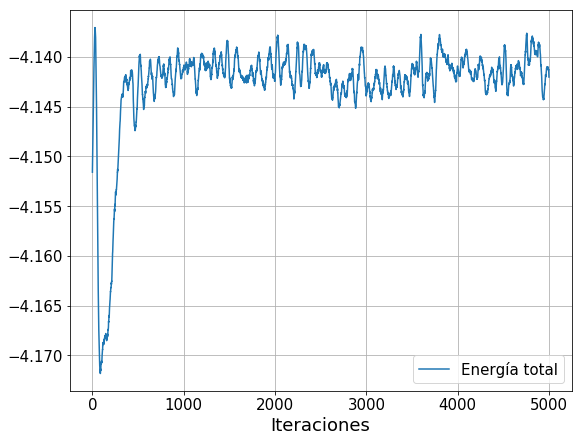

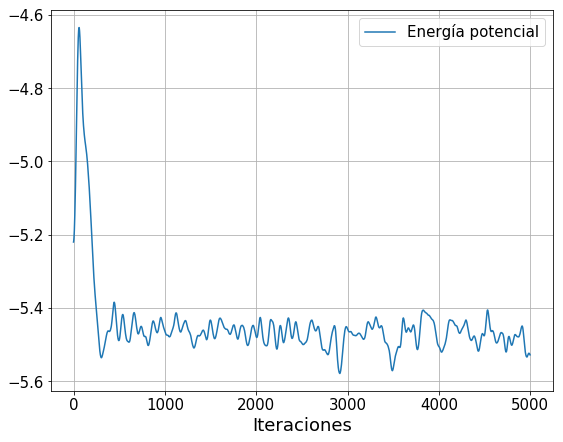

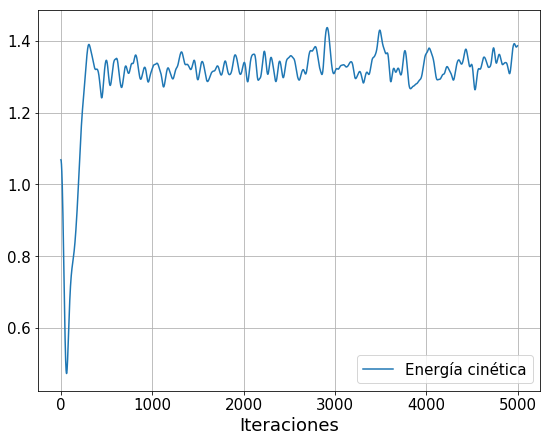

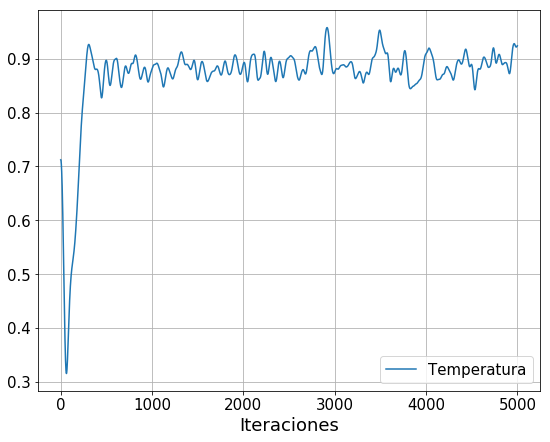

In [19]:
E_pot = A[:,1]
E_cin = A[:,2]
E_tot = E_pot + E_cin
Graficador(E_tot,'Energía total')
Graficador(E_pot,'Energía potencial')
Graficador(E_cin,'Energía cinética')
Graficador(E_cin/1.5,'Temperatura')

# Termalización

Para ver si el sistema termalizó, graficá $\lambda$ y $H$.

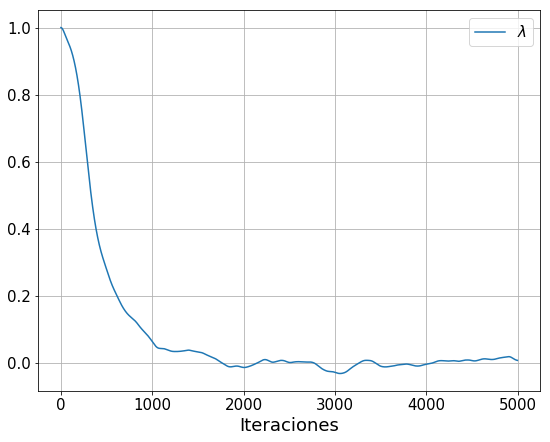

In [21]:
lambde = A[:,3]
Graficador(lambde,'$\lambda$')

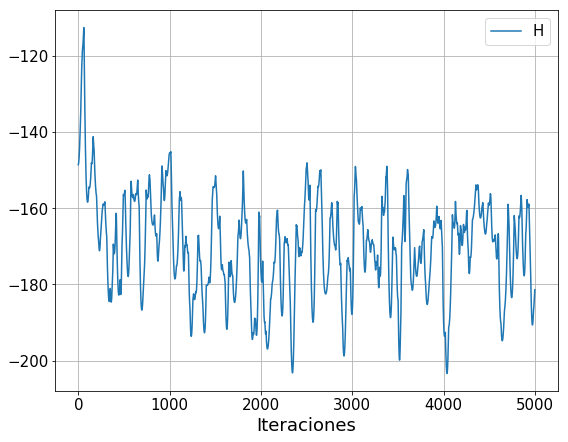

In [22]:
H = A[:,4]
Graficador(H,'H')

# Correlación

Ahora que sabes para cuantas iteraciones ya termalizó, corre la función correlación para ver cada cuanto se descorrelaciona, tirando los primeros estados no-termalizados.


Cuantos promedios queres hacer?
50
Y el tau es 19


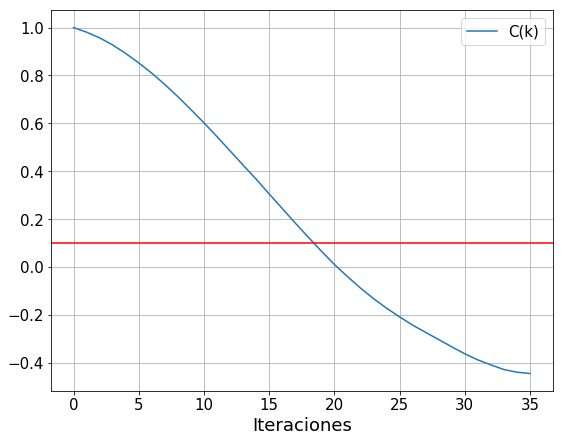

In [78]:
N = 1000 # PONE ACÁ EL VALOR QUE CORRESPONDA PARA YA TENER TODO TERMALIZADO

# La función Correlador recibe una matriz, entonces hay que armarla:

Matriz_Correl = np.zeros([len(A[N:,0]),2])
Matriz_Correl[:,0] = A[N:,0]
Matriz_Correl[:,1] = A[N:,1] + A[N:,2]

# Armo el vector C(k) de la correlacion con la funcion Correlador, lo grafico y obtengo el Tau

C_k = Correlador(Matriz_Correl)
Porcentaje_10 = max(C_k)*0.1
Graficador(C_k,'C(k)',Porcentaje_10)
T = Tau(C_k)
print('Y el tau es',T)

Con la cantidad de iteraciones para termalizar y la cantidad de iteraciones para descorrelacionar podes ir a main_1b.

# BREVE TESTEO DE FUNCION HISTOGRAMA DE LA PAGINA DE LA MATERIA

In [3]:
Dir = r"C:\Users\Paula\Documents\Facultad\Física Computacional\Dinámica Molecular"
os.chdir(Dir)
Hist = np.loadtxt("Resultado_histograma.txt")

<BarContainer object of 10 artists>

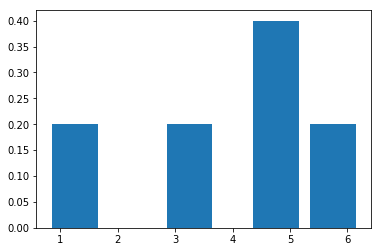

In [16]:
plt.bar(Hist[:,1],Hist[:,0])